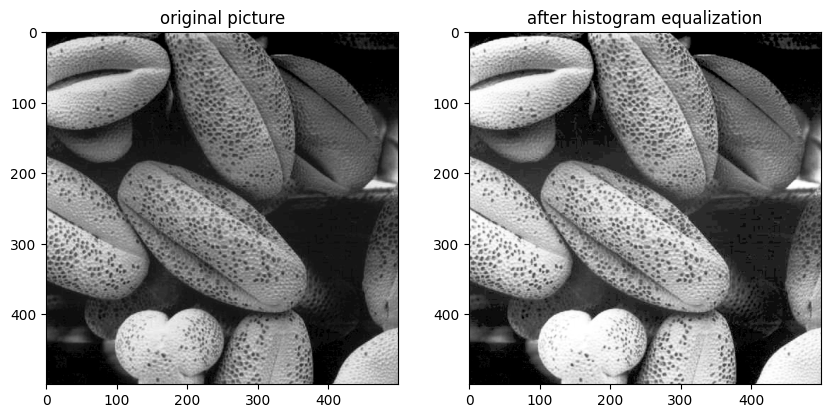

In [1]:
import cv2
import matplotlib.pyplot as plt

# 讀取灰階 TIF 圖像
img = cv2.imread('Image--a.tif', cv2.IMREAD_GRAYSCALE)

# 進行直方圖均衡化
equalized_img = cv2.equalizeHist(img)

# 顯示原始圖像和均衡化後的圖像
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('original picture')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('after histogram equalization')
plt.imshow(equalized_img, cmap='gray')

plt.show()

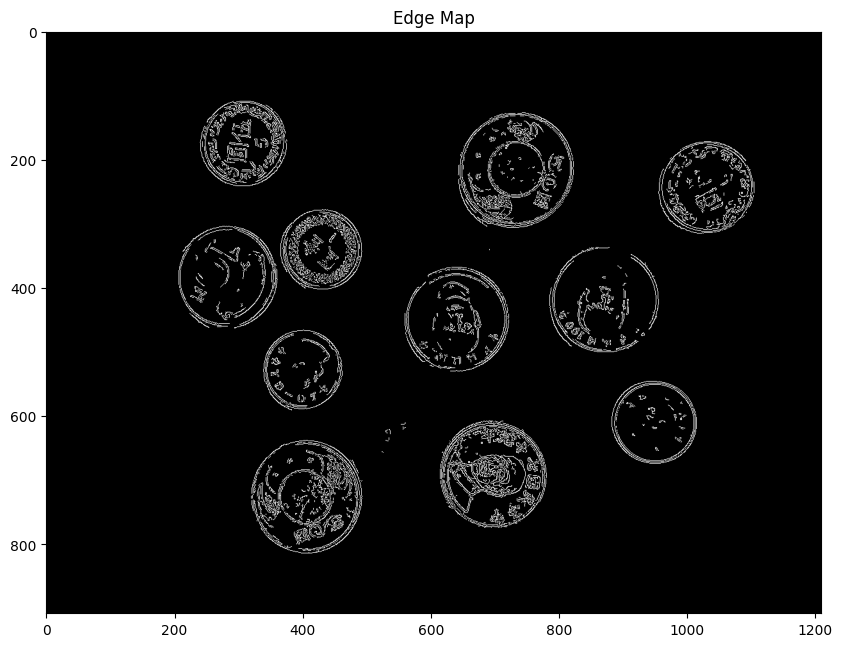

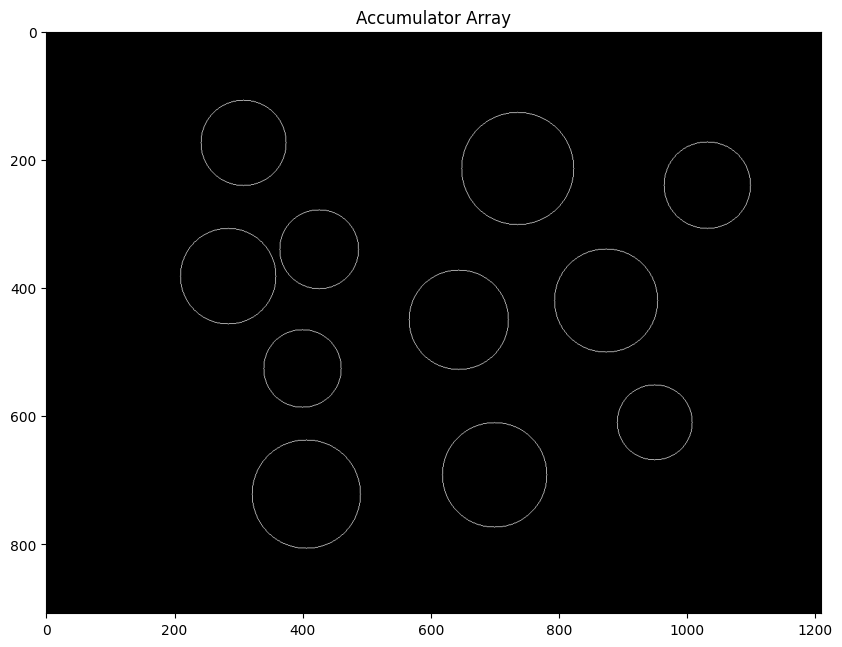

Center=(950,610),Radius=59
Center=(700,692),Radius=82
Center=(644,450),Radius=78
Center=(736,214),Radius=88
Center=(406,722),Radius=85
Center=(308,174),Radius=67
Center=(284,382),Radius=75
Center=(874,420),Radius=81
Center=(426,340),Radius=62
Center=(1032,240),Radius=68
Center=(400,526),Radius=61


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像並轉換為灰階
image = cv2.imread('/content/Image--b  coin (1).jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用Canny邊緣檢測來獲取Edge map
edges = cv2.Canny(gray_image, 100, 200)

# 圖示邊緣檢測結果
plt.figure(figsize=(10, 10))
plt.title("Edge Map")
plt.imshow(edges, cmap='gray')
plt.show()

# 使用圓霍夫變換來檢測圓並生成Accumulator array
# 可以調整 param1 和 param2 的值來提高檢測精度
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=60,param1=50, param2=40, minRadius=10, maxRadius=100)

# 初始化統計陣列，畫出參數空間
accumulator = np.zeros_like(gray_image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(accumulator, (x, y), r, (255), thickness=1)

# 圖示統計陣列
plt.figure(figsize=(10, 10))
plt.title("Accumulator Array")
plt.imshow(accumulator, cmap='gray')
plt.show()

circles = np.uint16(np.around(circles))
for circle in circles[0,:]:
  x,y,r=circle
  print(f"Center=({x},{y}),Radius={r}")



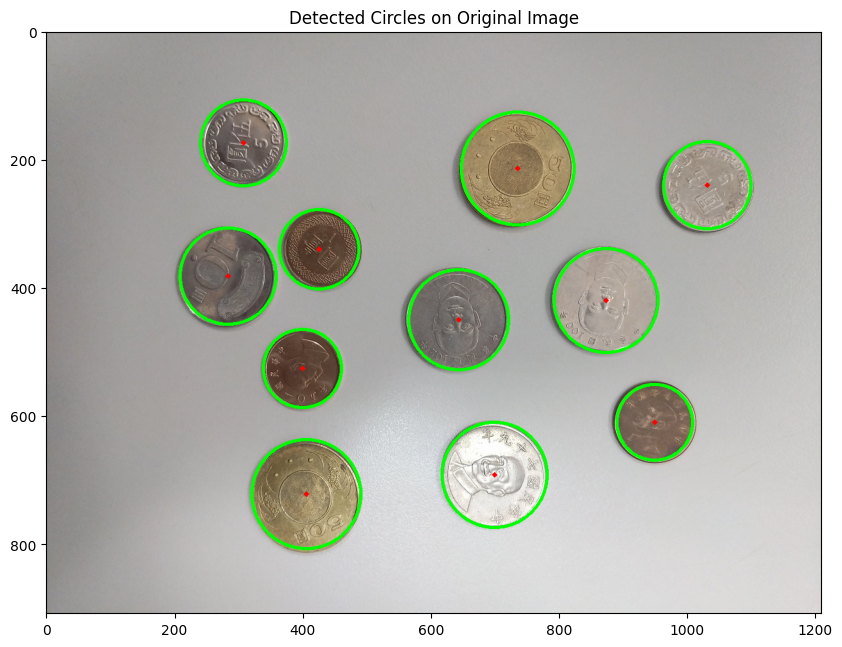

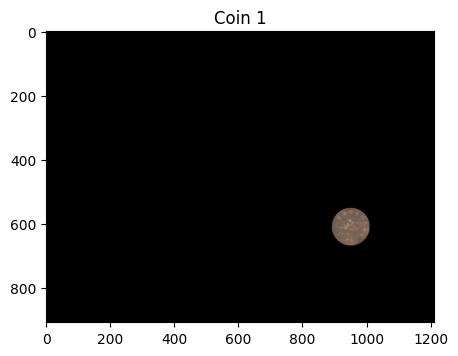

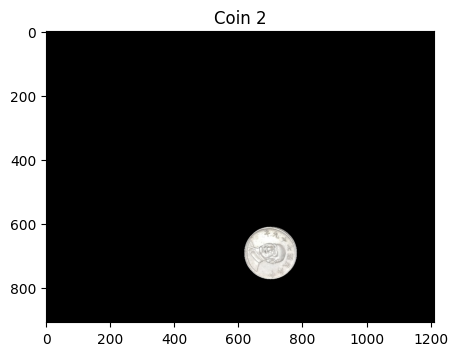

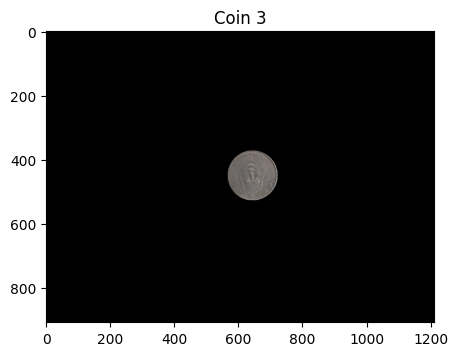

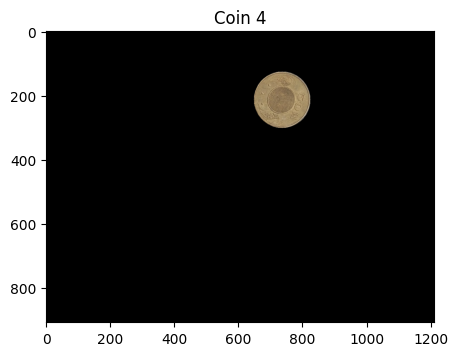

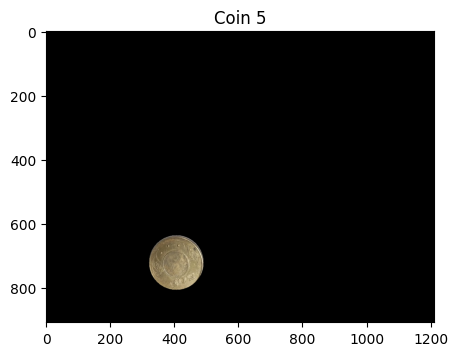

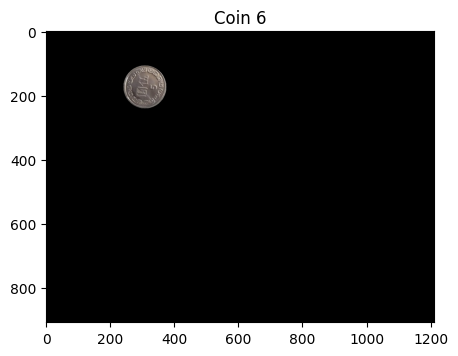

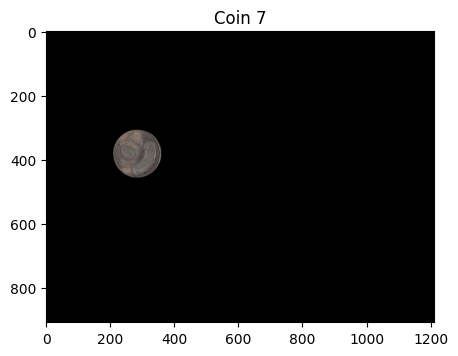

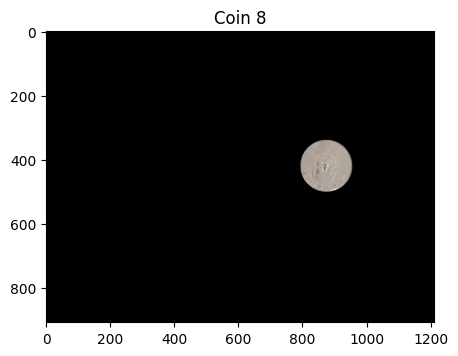

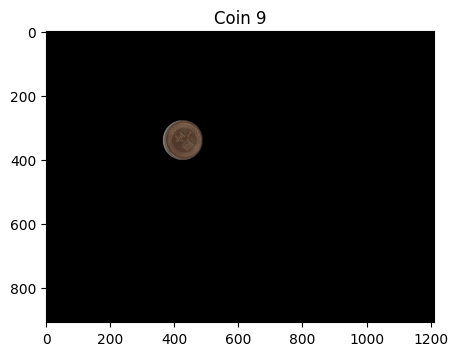

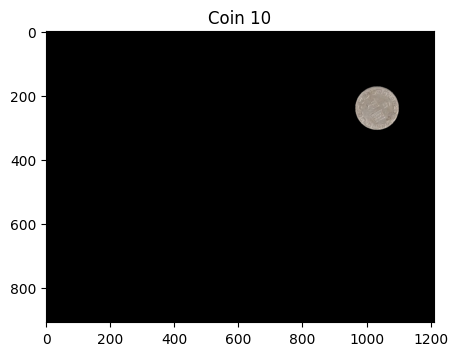

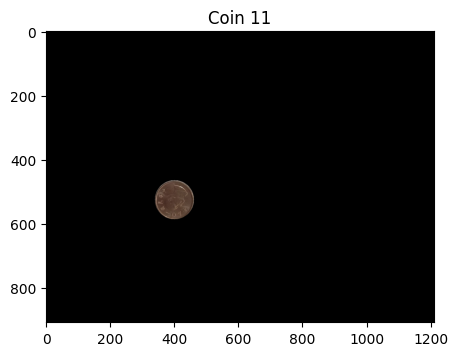

In [12]:
# 將結果標記在原圖上
output_image = image.copy()
if circles is not None:
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), thickness=3)  # 標記圓的邊緣
        cv2.circle(output_image, (x, y), 2, (0, 0, 255), thickness=3)  # 標記圓心

# 圖示標記後的原圖
plt.figure(figsize=(10, 10))
plt.title("Detected Circles on Original Image")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# 將各個幣別之圖像截取出來
coin_images = []
if circles is not None:
    for circle in circles[0, :]:
        x, y, r = circle
        # 提取每個圓內的圖像
        mask = np.zeros_like(gray_image)
        cv2.circle(mask, (x, y), r, (255), -1)
        coin_image = cv2.bitwise_and(image, image, mask=mask)
        coin_images.append(coin_image)

# 顯示提取的每個幣別圖像
for i, coin_image in enumerate(coin_images):
    plt.figure(figsize=(5, 5))
    plt.title(f"Coin {i+1}")
    plt.imshow(cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB))
    plt.show()
